## Business Questions
- Does long-term investment in the Saudi Arabian Market-index is worth while?

One of the ways to assess the long-term investment is to calculate the average return over the past 0 years of the index. In order to do that we might need to collect a 10 years worth of data.

- Does the Saudi Market get influenced by political decisions? 

This is a tough question to ask but in order to demonstrat if indeed Saudi market is influenced by political decisions, we will look at how the market reacted after the appointment Prince Mohammed Bin Salman the Crown Prince. 

- Is there a relationship between the Saudi stock market fluctuations and the oil prices  ? 

We can achieve that visually by ploting two indexes for  the past 5 years. 


## Data Understanding 

- What are the source of our data?
 
 The data will be from the Saudi Stock Exchange.
 
 
- What are the ways in which we can collect data?
 
 Since the Saudi Stock does not provide API, we will scrape the data from the website. 


- What are the variables in the stock market? 
 
*Date* : The date of the closing day 

*high* : the highest value of the stock 

*low* : the lowest value of the stock 

*open* : the value at which the trading day begun 

*totalVolume* : the total volume of stocks that have been traded 

*totalTurnover* : the total value of the traded stocks. 


In [55]:
# importing the requests library 
import requests 
import math
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def url_parser(page_num, from_date, to_date):
    """url parser that craetes http addresses to be sent to the Tadawul server

    Parameters
    ----------
    page_num : int
        the page number of the requested data; this is meant to address the pagination issue.
    from_date : str
         the start data in which we start the scraping of data 
    
    to_date : str
         the end data in which we end the scraping of data 
         
    Returns
    -------
    str
        an http url link 
    """
    url_query_head = "https://www.tadawul.com.sa/wps/portal/tadawul/markets/equities/indices/today/!ut/p/z1/rZFNTwIxEIZ_C4cepbOwgnprTFhrViIRcO1lU7pVavqxaQuL_97CzUSXGJ3bZJ4nM28GM1xhZvlevfGonOU69S9sUo9Gt1fZdQ4llNMMyKQAunjIx8UM8HMfAEWG2a_8gs6nQBbkbj1bL5M__psP-Xmf9SLzrB84RfwKfJOhFzgeeQLghyKA78_lSI_axtjeIEDQdd1QbcxQOIPgYLQNCFrvGgQNjzx-tBKBcDZKGxF4GdzOC3khnNZSHP8eMIt8Q20jD7h6lP7VecOtkP-9RGy5j3XkQdVi530i65CGzuNqSZ4obs1qVYGi75d6X5LB4BP_kbdL/p0/IZ7_NHLCH082KGN530A68FC4AN2OM2=CZ6_22C81940L0L710A6G0IQM43GF0=N/?draw=25&columns%5B0%5D%5Bdata%5D=date&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=open&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=high&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=low&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=close&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=totalVolume&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=totalTurnover&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B7%5D%5Bdata%5D=noOfTrades&columns%5B7%5D%5Bname%5D=&columns%5B7%5D%5Bsearchable%5D=true&columns%5B7%5D%5Borderable%5D=true&columns%5B7%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B7%5D%5Bsearch%5D%5Bregex%5D=false&order%5B0%5D%5Bcolumn%5D=0&order%5B0%5D%5Bdir%5D=desc&start="
    date_from = dt.datetime.strptime(from_date, "%Y-%m-%d")
    date_to = dt.datetime.strptime(to_date,"%Y-%m-%d" )
    
    url_parts = [url_query_head, str(page_num),"&length=10&search%5Bvalue%5D=&search%5Bregex%5D=false&sourceCallerId=datePicker&dateParameter=", str(date_from.year), "%2F", str(date_from.month), "%2F", str(date_from.day),"+-+",str(date_to.year),"%2F",str(date_to.month),"%2F",str(date_to.day),"&typeOfCall=adjustedType"]
    parsed_url = ""
    return(parsed_url.join(url_parts))

In [4]:
def get_index_raw(f_date, t_date):
    
    """a wrapper function of the url parser that will send each link to the server

    Parameters
    ----------
    f_date : str
         the start data in which we start the scraping of data 
    
    t_date : str
         the end data in which we end the scraping of data 
         
    Returns
    -------
    pandas.DataFrame
        A dataframe of the timeseries record we specified the start and end data for. 
    """
    
    rq = requests.get(url = url_parser(0,f_date, t_date))
    n_records = rq.json()['recordsFiltered']
    if(n_records <= 10):
        n_page = 1
    else:
        n_page = math.ceil(n_records/10)
    for i in np.arange(0,n_page):
        url = url_parser(i, from_date=f_date, to_date=t_date)
        if i == 0:
            df = pd.io.json.json_normalize(requests.get(url = url).json()['data'])
        else:
            url = url_parser(i*10, from_date=f_date, to_date=t_date)
            df = pd.concat([df,pd.DataFrame(pd.io.json.json_normalize(requests.get(url = url).json()['data']))],ignore_index=True)
    return(df)    

In [31]:
# Graping sample of the data 
index_df = get_index_raw('2018-01-01', '2018-03-30')

## Data preperation 

if we check the types of the columns in the data frame, we will find that pandas recognizes them as strings. This is not what we want as we know that all of the values are numbers except for the 'date' column. Therefore, we would need to fix the column types before we proceed. 

In [32]:
index_df.dtypes

close            object
date             object
high             object
low              object
noOfTrades       object
open             object
totalTurnover    object
totalVolume      object
dtype: object

In the Code below we perform the following 

- Convert the "date" column to a datetime type and set it as the index
- Remove the commas before we try to convert other columns to numeric. It will produce error if we skipped this step
- Now we can convert them to numeric

those changes makes dealing with the timeseries data much simpler as we plot them and allow matplotlib to set the right x axis ticks appropriately. 

In [64]:
def clean_up(data):
    
    """a clean up function that converts that each colum data type to the appropriate type. 

    Parameters
    ----------
    data : pandas.DataFrame
         a messy data frame with the incorrect types 
         
    Returns
    -------
    pandas.DataFrame
        a clean data frame with the correct types 
    """
    #We convert 'date' column to datetime type
    data['date'] = pd.to_datetime(data['date'])

    #We will remove the commas before we try to convert other columns to numeric. It will produce error if we skipped this step. 
    data[["close", "high", "low", "noOfTrades", "open", "totalTurnover", "totalVolume"]] = data[["close", "high", "low", "noOfTrades", "open", "totalTurnover", "totalVolume"]].apply(lambda x: x.str.replace(',',''))

    #Now we can convert them to numeric 
    data[["close", "high", "low", "noOfTrades", "open", "totalTurnover", "totalVolume"]] = data[["close", "high", "low", "noOfTrades", "open", "totalTurnover", "totalVolume"]].apply(pd.to_numeric)
    data.set_index(data['date'], inplace = True)
    return(data)

## Modeling - Analysis

In this part we are not going to develop a model but rather analyze our data to extract some insights

### Answering our Questions 

With all functions set up, we are ready to answer our questions. 



## Does long-term investment in the Saudi Arabian Market-index is worth while?

The conventional wisdom of the financial markets tells us that investing in the stock market pays off in the long run. This has been particularly true especially in the developed countries. However, this might be different for stock markets in the developing countries like Saudi Arabia. Here we will get the closing price of the index for the past 10 years period to examine the truth of this convention. 

In [71]:
#10 years period of the index 
df = get_index_raw('2009-05-28', '2019-05-28')

In [72]:
clean_up(df);

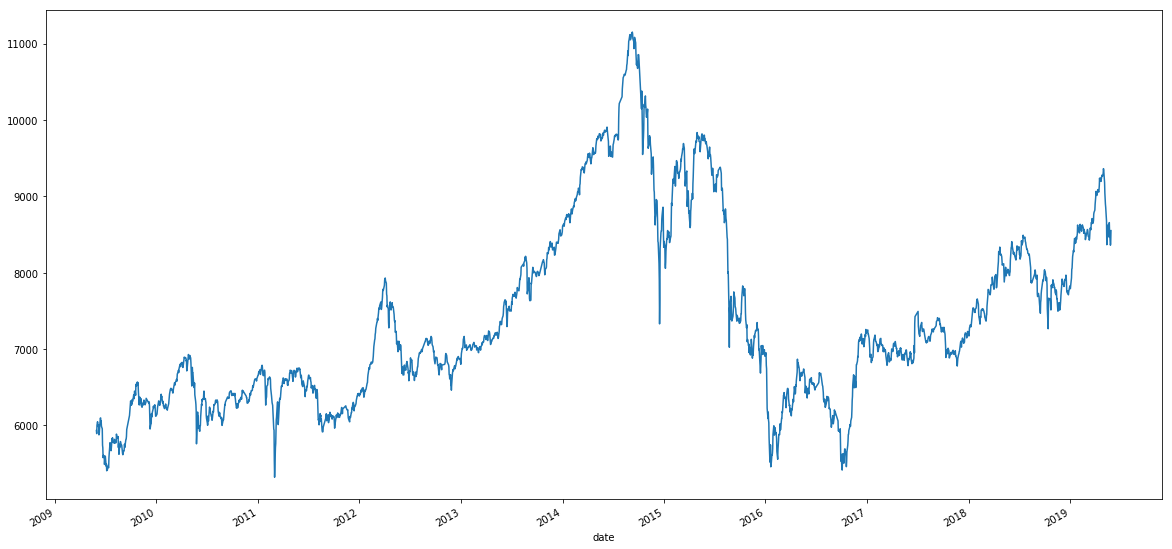

In [73]:
df['close'].plot(figsize=(20,10));

## Does the Saudi Market get influenced by political decisions? 

This is a tough question to ask but in order to demonstrat if indeed Saudi market is influenced by political decisions, we will look at how the market reacted after the appointment Prince Mohammed Bin Salman the Crown Prince.

In [98]:
sub_df = df.loc['2017']

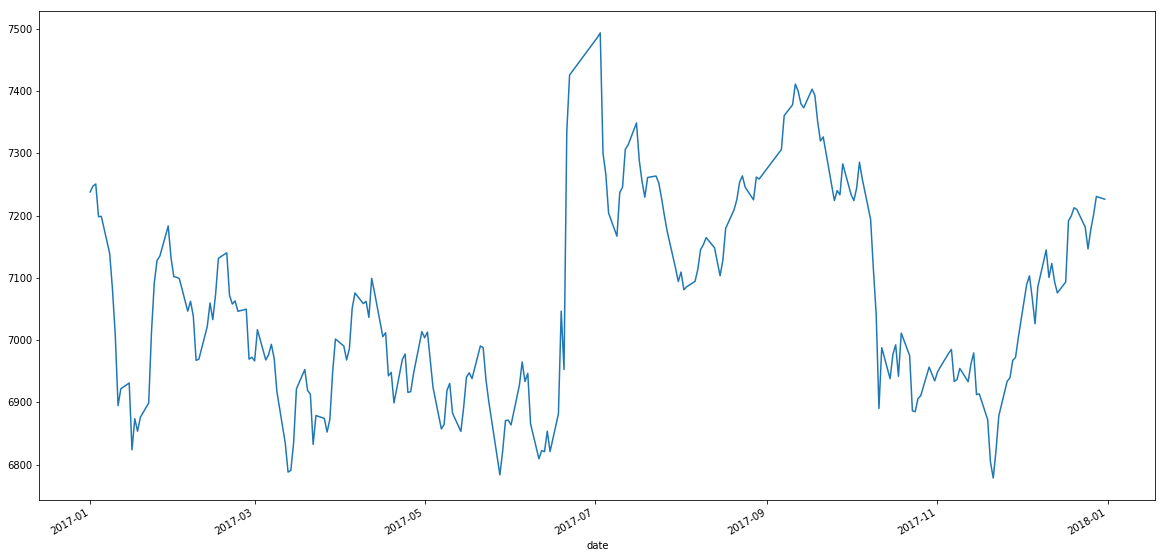

In [99]:
sub_df['close'].plot(figsize=(20,10));

The graph shows that stock market has responded positively when the Saudi government appointed the prince Mohammed bin Salman as the Crown price back in June 2017. Clearly political decisions made by the government influence the Saudi Stock market and create opportunities for investors to profit

## Is there a relationship between the Saudi stock market fluctuations and the oil prices  ? 

As we can see the trend of oil price closely match the trend of Saudi Stock market index.

Therefore, and holding everything else constant, investing in Saudi Stock pertain the same risk as investing the the crude oil commodity. Long term returns usually depends on diversified investment and this is not what is happening here.

![](https://drive.google.com/uc?id=1svzhEM9bQ9cimH78XWH4rix3LlgMh3JT)

## Conclusion 

Long term investment in the Saudi stock market does not follow the common wisdom about the stock market as the market is highly volatile. The primary reason for this volatility is the strong relationship between the Saudi economy and the Oil market. 

However, the government has been taking initiatives to break this connection. There were number of changes introduced including the leadership of the government as in the example of the appointment of Prince Mohammed bin Salman as the Crown Prince which lead to market shocks. Those shocks create opporutinites for investors to profit.  